<br>
Regression Dataset for Household Income 

In [258]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer   # here it used for the making the normal distbution

In [2]:
from  sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge

from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import TheilSenRegressor

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
# from sklearn.metrics import accuracy_score

In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

<br>
Features:
<br>
Age: Age of the primary household member (18 to 70 years).

Education Level: Highest education level attained (High School, Bachelor's, Master's, Doctorate).

Occupation: Type of occupation (Healthcare, Education, Technology, Finance, Others).

Number of Dependents: Number of dependents in the household (0 to 5).

Location: Residential location (Urban, Suburban, Rural).

Work Experience: Years of work experience (0 to 50 years).

Marital Status: Marital status of the primary household member (Single, Married, Divorced).

Employment Status: Employment status of the primary household member (Full-time, Part-time, Self-employed).

Household Size: Total number of individuals living in the household (1 to 7).

Homeownership Status: Homeownership status (Own, Rent).

Type of Housing: Type of housing (Apartment, Single-family home, Townhouse).

Gender: Gender of the primary household member (Male, Female).

Primary Mode of Transportation: Primary mode of transportation used by the household member
(Car, Public transit, Biking, Walking).

Annual Household Income: Actual annual household income, derived from a combination of features
with added noise. Unit USD



In [71]:
house_income = pd.read_csv('data.csv')
house_income.sample(5)

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
8271,28,Bachelor's,Finance,0,Urban,26,Married,Full-time,1,Own,Single-family home,Female,Walking,225064
9036,29,Bachelor's,Healthcare,5,Suburban,3,Single,Part-time,6,Rent,Single-family home,Male,Biking,345198
10,28,Bachelor's,Healthcare,4,Urban,50,Married,Full-time,5,Rent,Townhouse,Female,Car,68944
64,64,Bachelor's,Healthcare,0,Urban,5,Married,Part-time,6,Own,Apartment,Female,Car,1142923
8961,48,Bachelor's,Healthcare,3,Suburban,15,Divorced,Self-employed,7,Own,Apartment,Female,Car,74264


In [72]:
house_income.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


In [73]:
house_income.shape 

(10000, 14)

In [74]:
house_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  int64 
 1   Education_Level                 10000 non-null  object
 2   Occupation                      10000 non-null  object
 3   Number_of_Dependents            10000 non-null  int64 
 4   Location                        10000 non-null  object
 5   Work_Experience                 10000 non-null  int64 
 6   Marital_Status                  10000 non-null  object
 7   Employment_Status               10000 non-null  object
 8   Household_Size                  10000 non-null  int64 
 9   Homeownership_Status            10000 non-null  object
 10  Type_of_Housing                 10000 non-null  object
 11  Gender                          10000 non-null  object
 12  Primary_Mode_of_Transportation  10000 non-null 

<br>
no null values we have in this data 

In [75]:
house_income.isnull().sum()

Age                               0
Education_Level                   0
Occupation                        0
Number_of_Dependents              0
Location                          0
Work_Experience                   0
Marital_Status                    0
Employment_Status                 0
Household_Size                    0
Homeownership_Status              0
Type_of_Housing                   0
Gender                            0
Primary_Mode_of_Transportation    0
Income                            0
dtype: int64

In [76]:
house_income.duplicated().sum()

0

In [77]:
house_income.describe()

,Age,Number_of_Dependents,Work_Experience,Household_Size,Income
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,44.021700,2.527000,24.858800,3.989600,8.168382e+05
std,15.203998,1.713991,14.652622,2.010496,1.821089e+06
min,18.000000,0.000000,0.000000,1.000000,3.104400e+04
25%,31.000000,1.000000,12.000000,2.000000,6.844600e+04
50%,44.000000,3.000000,25.000000,4.000000,7.294300e+04
75%,57.000000,4.000000,37.000000,6.000000,3.506675e+05
max,70.000000,5.000000,50.000000,7.000000,9.992571e+06


In [78]:
house_income.describe().corr()

,Age,Number_of_Dependents,Work_Experience,Household_Size,Income
Age,1.000000,0.999988,0.999998,0.999989,-0.189583
Number_of_Dependents,0.999988,1.000000,0.999992,1.000000,-0.192424
Work_Experience,0.999998,0.999992,1.000000,0.999993,-0.189699
Household_Size,0.999989,1.000000,0.999993,1.000000,-0.192352
Income,-0.189583,-0.192424,-0.189699,-0.192352,1.000000


# now applying the EDA 

In [79]:
house_income.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


In [165]:
# here we droping this Number_of_Dependents	
house_income = house_income.drop(columns=['Number_of_Dependents'],axis =1)
house_income.head()

,Age,Education_Level,Occupation,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


In [166]:
house_income['Education_Level'].value_counts()

Education_Level
Bachelor's     4058
High School    2959
Master's       2482
Doctorate       501
Name: count, dtype: int64

<br>
applying the univarte anlys 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3336\3279442786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Education_Level',data = house_income,color = "r",palette='colorblind')


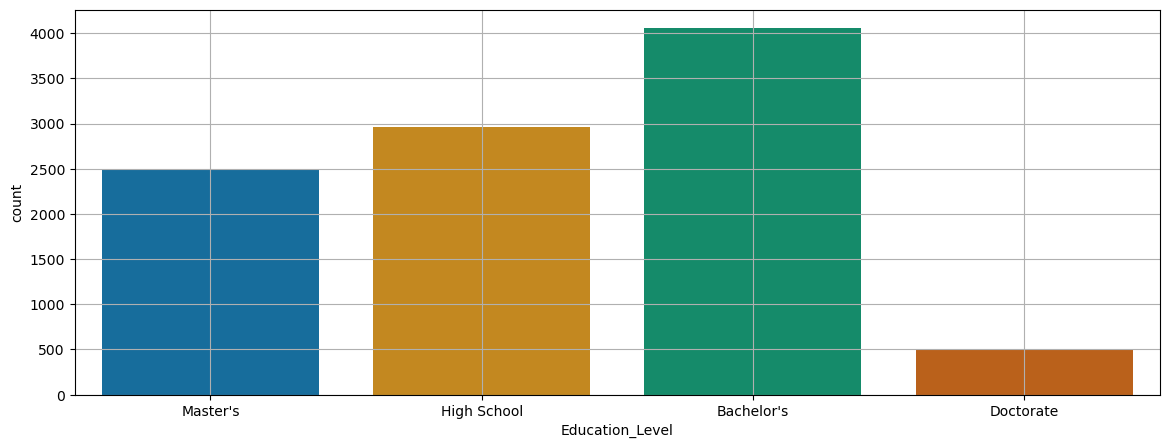

In [167]:
plt.figure(figsize = (14,5))
sns.countplot(x = 'Education_Level',data = house_income,color = "r",palette='colorblind')
plt.grid(True)  # Adds gridlines to the plot
plt.show()

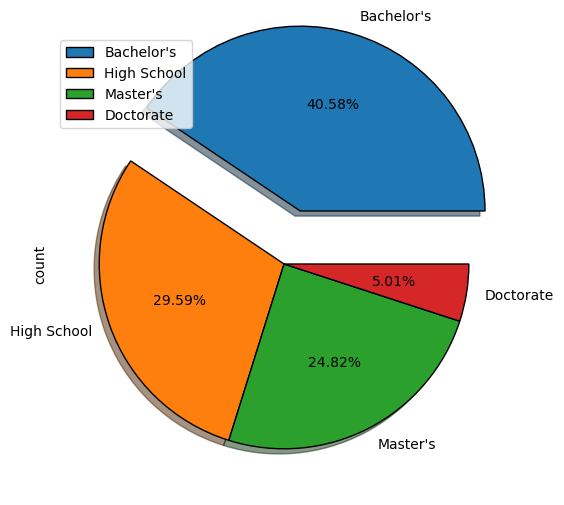

In [168]:
plt.figure(figsize = (6,6))
explode = (0.3, 0, 0,0)
house_income['Education_Level'].value_counts().plot(kind="pie",autopct = '%.2f%%',explode=explode,shadow=True,wedgeprops={'edgecolor': 'black'})
# plt.legend()abs
plt.legend(
    loc='upper left')
plt.show()

In [169]:
house_income['Occupation'].value_counts()

Occupation
Healthcare    3035
Technology    2407
Finance       1525
Others        1521
Education     1512
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3336\1708670809.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Occupation',data = house_income,palette='colorblind')


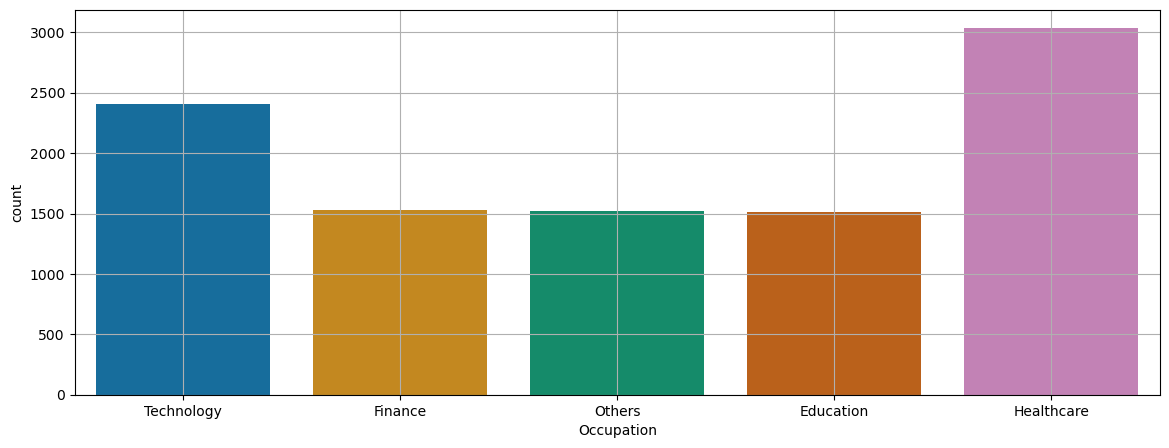

In [170]:
plt.figure(figsize = (14,5))
sns.countplot(x = 'Occupation',data = house_income,palette='colorblind')
plt.grid(True) 
plt.show()

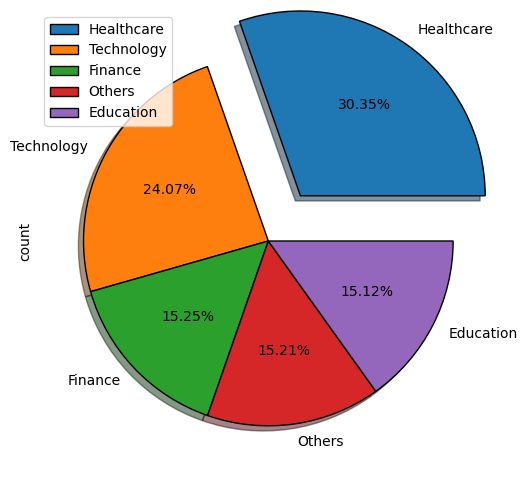

In [171]:
plt.figure(figsize = (6,6))
explode = (0.3, 0, 0, 0,0)
house_income['Occupation'].value_counts().plot(kind="pie",autopct = '%.2f%%',explode=explode,shadow=True,wedgeprops={'edgecolor': 'black'})
plt.legend()
plt.show()

In [172]:
house_income['Location'].value_counts()

Location
Urban       7037
Suburban    1951
Rural       1012
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3336\24904630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Location',data = house_income,palette='colorblind')


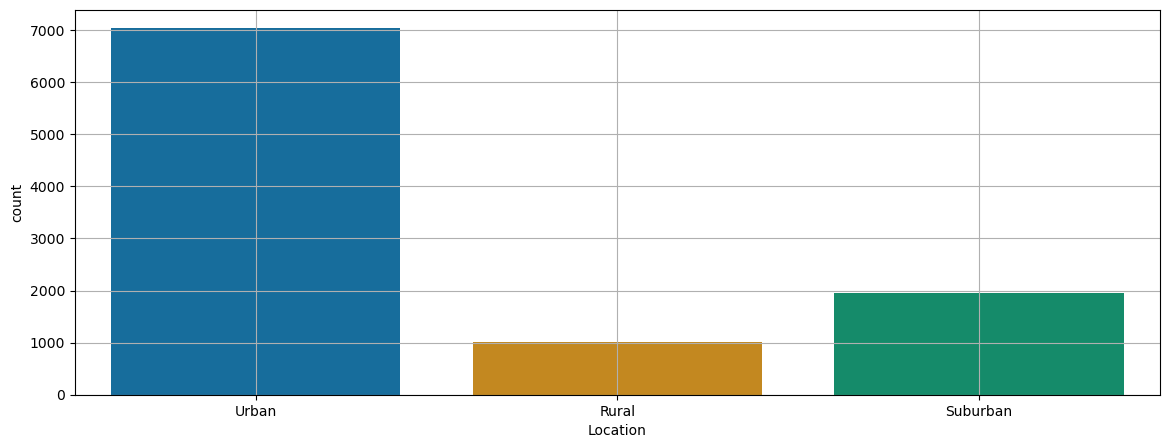

In [173]:
plt.figure(figsize = (14,5))
sns.countplot(x = 'Location',data = house_income,palette='colorblind')
plt.grid(True) 
plt.show()

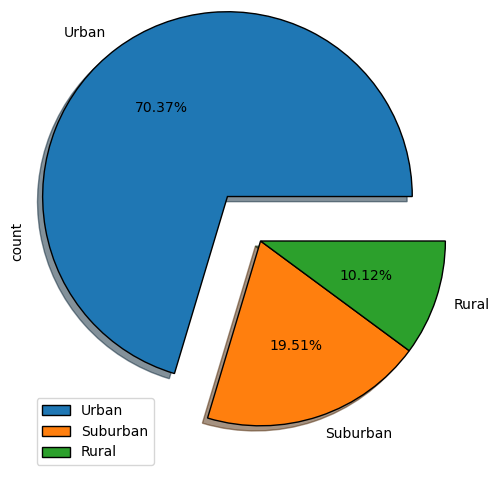

In [174]:
plt.figure(figsize = (6,6))
explode = (0.3, 0, 0)
house_income['Location'].value_counts().plot(kind="pie",autopct = '%.2f%%',explode=explode,shadow=True,wedgeprops={'edgecolor': 'black'})
plt.legend()
plt.show()

In [175]:
house_income.head()

,Age,Education_Level,Occupation,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


In [176]:
house_income['Marital_Status'].value_counts()

Marital_Status
Married     5136
Single      3900
Divorced     964
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3336\572213426.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Marital_Status',data = house_income,palette='colorblind')


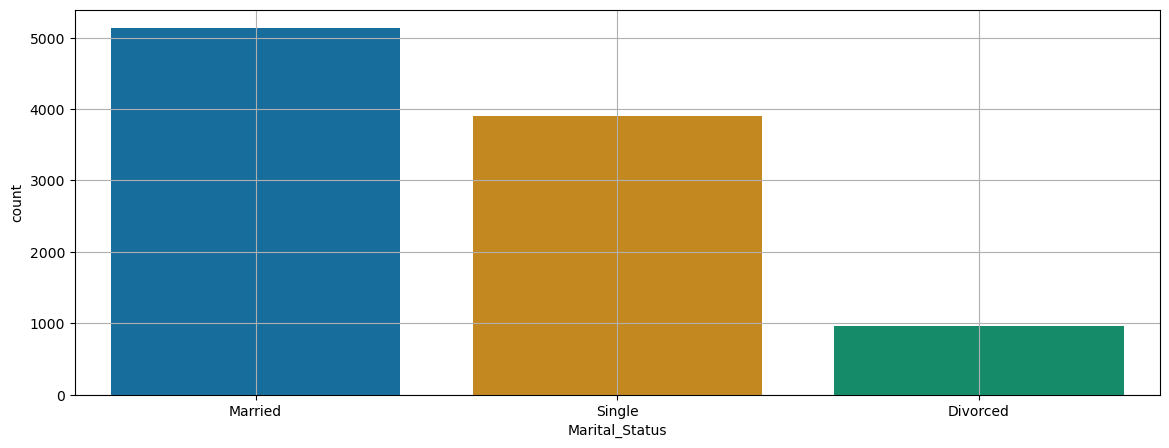

In [177]:
plt.figure(figsize = (14,5))
sns.countplot(x = 'Marital_Status',data = house_income,palette='colorblind')
plt.grid(True) 
plt.show()

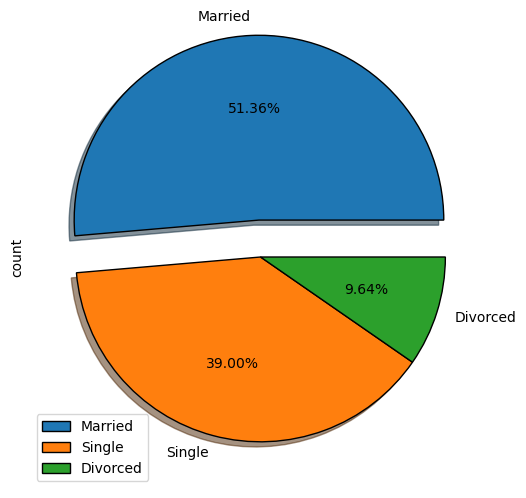

In [178]:
plt.figure(figsize = (6,6))
explode = (0.2, 0, 0)
house_income['Marital_Status'].value_counts().plot(kind="pie",autopct = '%.2f%%',explode=explode,shadow=True,wedgeprops={'edgecolor': 'black'})
plt.legend()
plt.show()

In [179]:
house_income['Employment_Status'].value_counts()

Employment_Status
Full-time        5004
Part-time        3016
Self-employed    1980
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3336\2690658246.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Employment_Status',data = house_income,palette='colorblind')


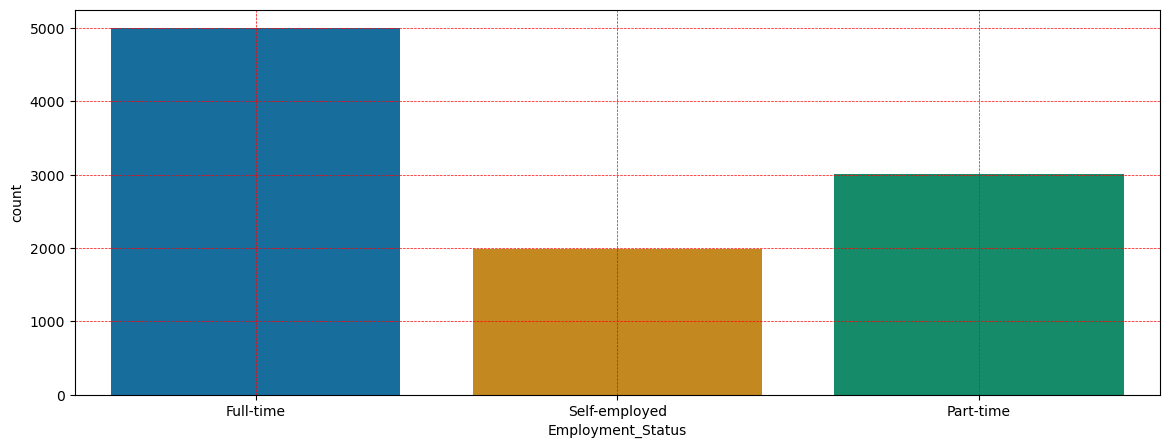

In [180]:
plt.figure(figsize = (14,5))
sns.countplot(x = 'Employment_Status',data = house_income,palette='colorblind')
# plt.grid(True) 
plt.grid(which='both', linestyle='--', linewidth=0.5, color='red')
plt.show()

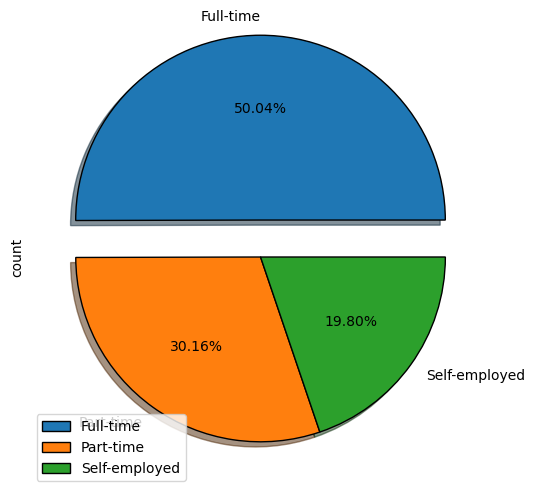

In [181]:
plt.figure(figsize = (6,6))
explode = (0.2, 0, 0)
house_income['Employment_Status'].value_counts().plot(kind="pie",autopct = '%.2f%%',explode=explode,shadow=True,wedgeprops={'edgecolor': 'black'})
plt.legend()
plt.show()

In [182]:
house_income.head()

,Age,Education_Level,Occupation,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


In [183]:
house_income['Type_of_Housing'].value_counts()

Type_of_Housing
Single-family home    4055
Apartment             4001
Townhouse             1944
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3336\3638763035.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Type_of_Housing',data = house_income,palette='colorblind')


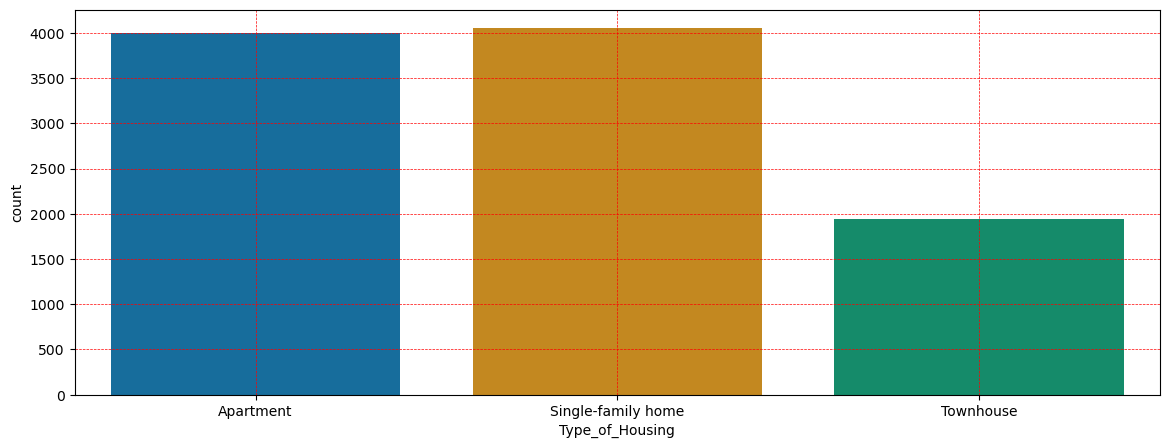

In [184]:
plt.figure(figsize = (14,5))
sns.countplot(x = 'Type_of_Housing',data = house_income,palette='colorblind')
# plt.grid(True) 
plt.grid(which='both', linestyle='--', linewidth=0.5, color='red')
plt.show()

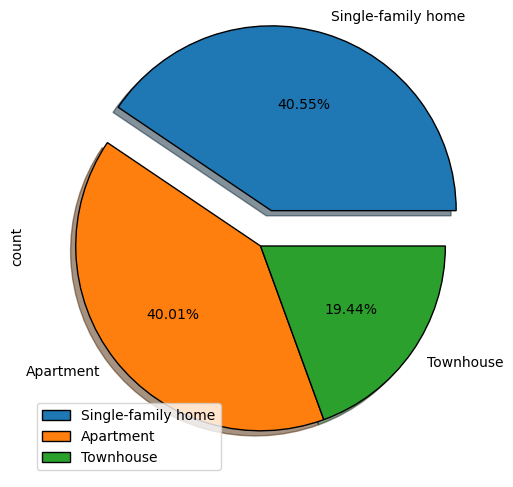

In [185]:
plt.figure(figsize = (6,6))
explode = (0.2, 0, 0)
house_income['Type_of_Housing'].value_counts().plot(kind="pie",autopct = '%.2f%%',explode=explode,shadow=True,wedgeprops={'edgecolor': 'black'})
plt.legend()
plt.show()

In [186]:
house_income['Gender'].value_counts()

Gender
Male      5123
Female    4877
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3336\2748560929.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Gender',data = house_income,palette='colorblind')


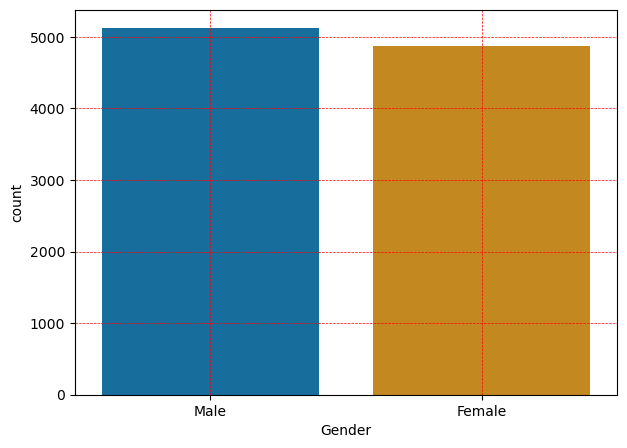

In [187]:
plt.figure(figsize = (7,5))
sns.countplot(x = 'Gender',data = house_income,palette='colorblind')
# plt.grid(True) 
plt.grid(which='both', linestyle='--', linewidth=0.5, color='red')
plt.show()

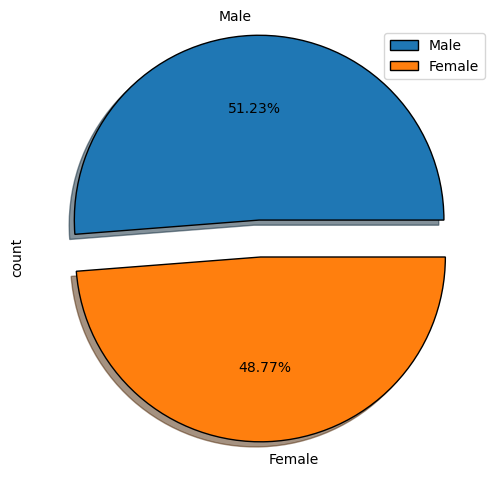

In [188]:
plt.figure(figsize = (6,6))
explode = (0.2, 0)
house_income['Gender'].value_counts().plot(kind="pie",autopct = '%.2f%%',explode=explode,shadow=True,wedgeprops={'edgecolor': 'black'})
plt.legend()
plt.show()

In [189]:
house_income['Primary_Mode_of_Transportation'].value_counts()

Primary_Mode_of_Transportation
Public transit    4047
Car               2986
Biking            1940
Walking           1027
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3336\1141116225.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Primary_Mode_of_Transportation',data = house_income,palette='colorblind')


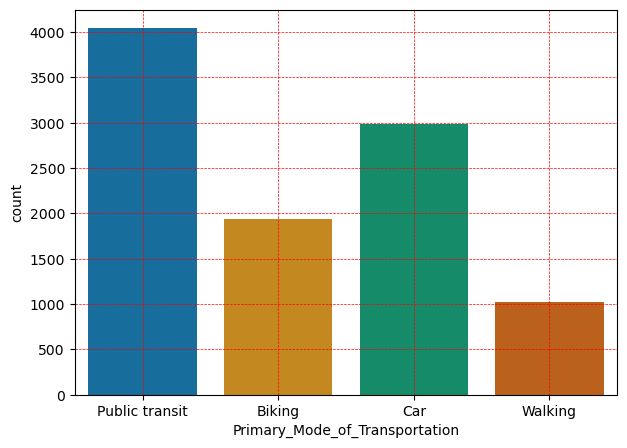

In [190]:
plt.figure(figsize = (7,5))
sns.countplot(x = 'Primary_Mode_of_Transportation',data = house_income,palette='colorblind')
# plt.grid(True) 
plt.grid(which='both', linestyle='--', linewidth=0.5, color='red')
plt.show()

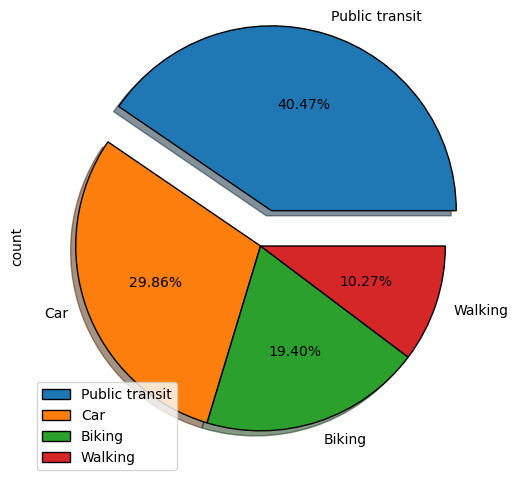

In [191]:
plt.figure(figsize = (6,6))
explode = (0.2, 0,0,0)
house_income['Primary_Mode_of_Transportation'].value_counts().plot(kind="pie",autopct = '%.2f%%',explode=explode,shadow=True,wedgeprops={'edgecolor': 'black'})
plt.legend()
plt.show()

<br>
here cheking data is normial distubited or not with help hist plot and Q-Q plot

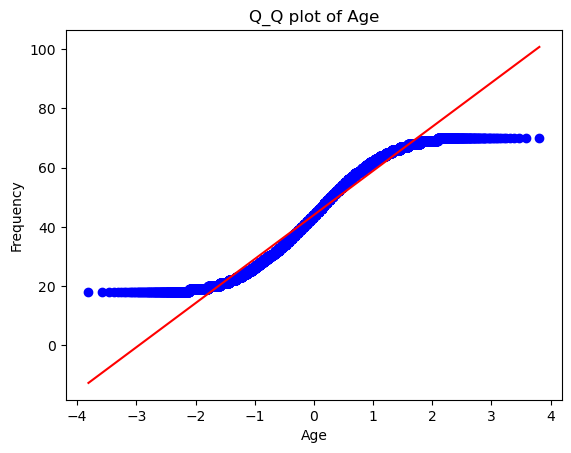

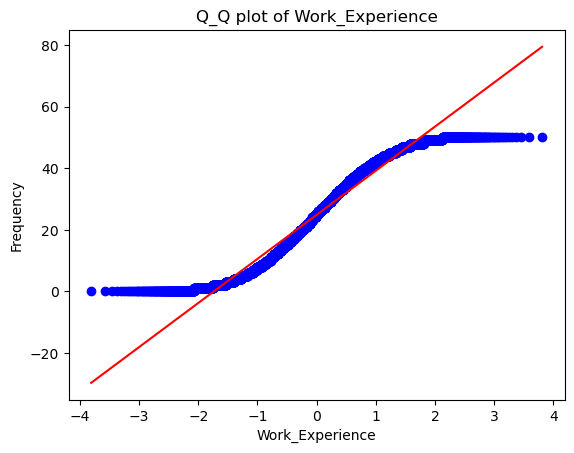

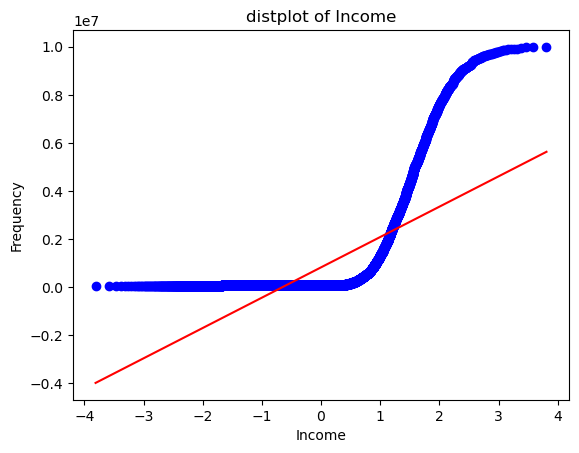

In [256]:
for column in house_income.columns:
     if column ==  'Age':
        # fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
        plt.figure()# Create a new figure for each plot
        stats.probplot(house_income[column],dist="norm", plot=plt)  # Plot histogram with 10 bins
        plt.xlabel(column)  # Set x-axis label as the column name
        plt.ylabel('Frequency')  # Set y-axis label
        plt.title(f'Q_Q plot of {column}')  # Set plot titl
        plt.show() 
     elif   column ==  'Work_Experience':
         plt.figure()# Create a new figure for each plot
       
         stats.probplot(house_income[column],dist="norm", plot=plt)  # Plot histogram with 10 bins
         plt.xlabel(column)  # Set x-axis label as the column name
         plt.ylabel('Frequency')  # Set y-axis label
         plt.title(f'Q_Q plot of {column}')  # Set plot titl 
         plt.show()
     # elif   column ==  'Homeownership_Status':
     #     plt.figure()# Create a new figure for each plot
       
     #     stats.probplot(house_income[column],dist="norm", plot=plt)  # Plot histogram with 10 bins
     #     plt.xlabel(column)  # Set x-axis label as the column name
     #     plt.ylabel('Frequency')  # Set y-axis label
     #     plt.title(f'Q_Q plot of {column}')  # Set plot titl 
     #     plt.show()
     elif   column ==  'Income':
         plt.figure()# Create a new figure for each plot
       
         stats.probplot(house_income[column],dist="norm", plot=plt)  # Plot histogram with 10 bins
         plt.xlabel(column)  # Set x-axis label as the column name
         plt.ylabel('Frequency')  # Set y-axis label
         plt.title(f'distplot of {column}')  # Set plot titl 
         plt.show()

     else: continue

<Figure size 640x480 with 0 Axes>

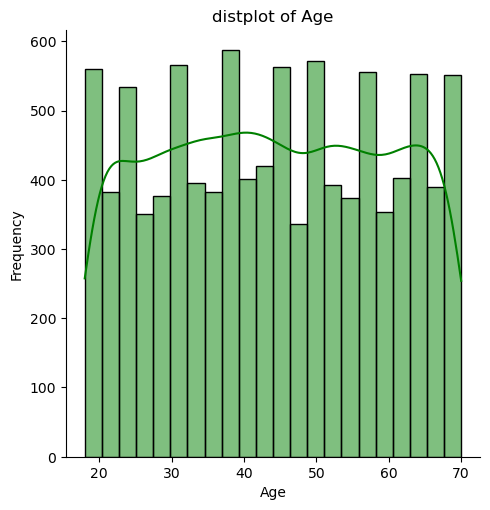

<Figure size 640x480 with 0 Axes>

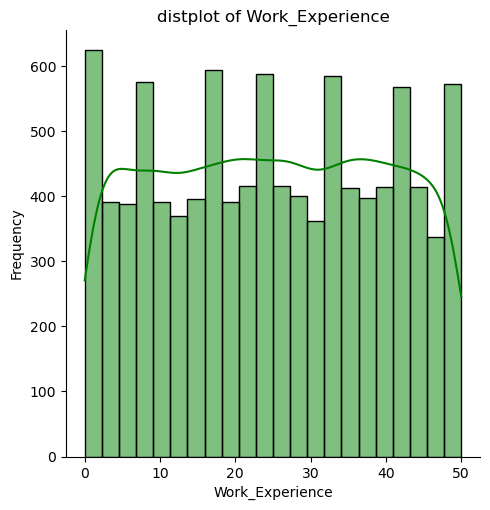

<Figure size 640x480 with 0 Axes>

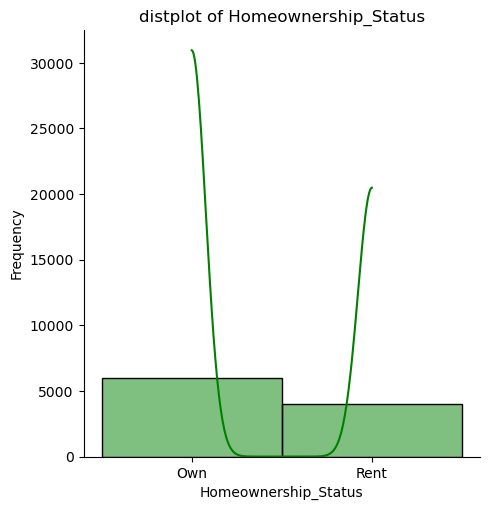

<Figure size 640x480 with 0 Axes>

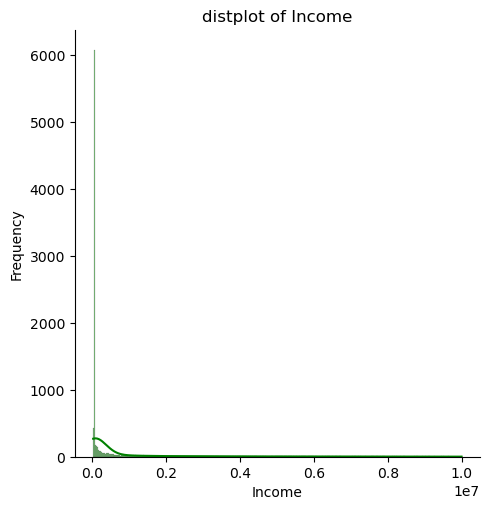

In [192]:
for column in house_income.columns:
     if column ==  'Age':
        # fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
        plt.figure()# Create a new figure for each plot
        sns .displot(house_income[column],color = "g",kde=True)  # Plot histogram with 10 bins
        plt.xlabel(column)  # Set x-axis label as the column name
        plt.ylabel('Frequency')  # Set y-axis label
        plt.title(f'distplot of {column}')  # Set plot titl
        plt.show() 
     elif   column ==  'Number_of_Dependents':
         # fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
         plt.figure()# Create a new figure for each plot
       
         sns .displot(house_income[column],color = "g",kde=True)  # Plot histogram with 10 bins
         plt.xlabel(column)  # Set x-axis label as the column name
         plt.ylabel('Frequency')  # Set y-axis label
         plt.title(f'distplot of {column}')  # Set plot titl 
         plt.show()
     elif   column ==  'Work_Experience':
         plt.figure()# Create a new figure for each plot
       
         sns .displot(house_income[column],color = "g",kde=True)  # Plot histogram with 10 bins
         plt.xlabel(column)  # Set x-axis label as the column name
         plt.ylabel('Frequency')  # Set y-axis label
         plt.title(f'distplot of {column}')  # Set plot titl 
         plt.show()
     elif   column ==  'Homeownership_Status':
         plt.figure()# Create a new figure for each plot
       
         sns .displot(house_income[column],color = "g",kde=True)  # Plot histogram with 10 bins
         plt.xlabel(column)  # Set x-axis label as the column name
         plt.ylabel('Frequency')  # Set y-axis label
         plt.title(f'distplot of {column}')  # Set plot titl 
         plt.show()
     elif   column ==  'Income':
         plt.figure()# Create a new figure for each plot
       
         sns .displot(house_income[column],color = "g",kde=True)  # Plot histogram with 10 bins
         plt.xlabel(column)  # Set x-axis label as the column name
         plt.ylabel('Frequency')  # Set y-axis label
         plt.title(f'distplot of {column}')  # Set plot titl 
         plt.show()

     else: continue

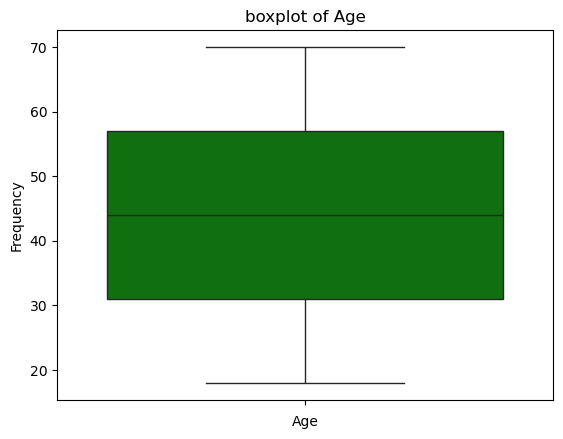

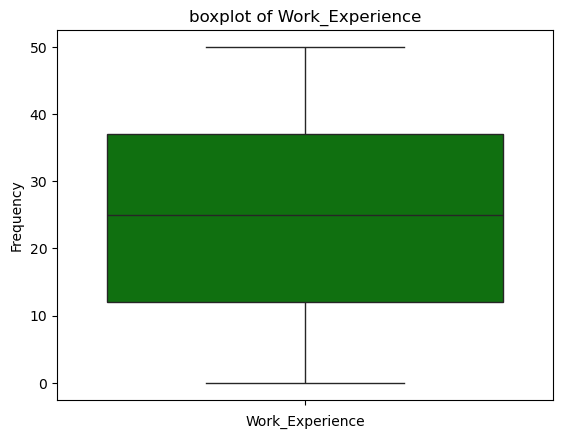

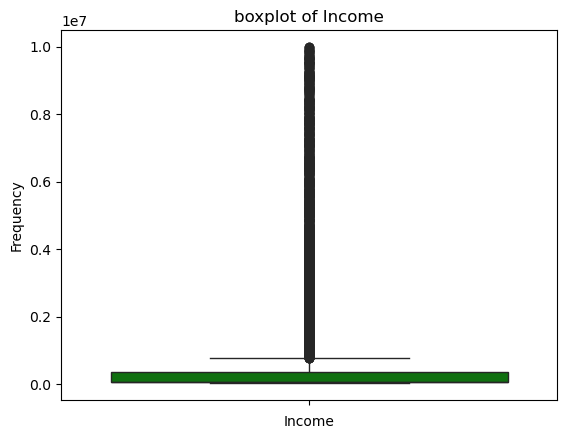

In [193]:
# here in this we dont have the outlies inside the data
# outlies we 
for column in house_income.columns:
     if column ==  'Age':
        # fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
        plt.figure()# Create a new figure for each plot
        sns .boxplot(house_income[column],color = "g")  # Plot histogram with 10 bins
        plt.xlabel(column)  # Set x-axis label as the column name
        plt.ylabel('Frequency')  # Set y-axis label
        plt.title(f'boxplot of {column}')  # Set plot titl
        plt.show() 
     elif   column ==  'Number_of_Dependents':
         # fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
         plt.figure()# Create a new figure for each plot
       
         sns .boxplot(house_income[column],color = "g")  # Plot histogram with 10 bins
         plt.xlabel(column)  # Set x-axis label as the column name
         plt.ylabel('Frequency')  # Set y-axis label
         plt.title(f'boxplot of {column}')  # Set plot titl 
         plt.show()
     elif   column ==  'Work_Experience':
         plt.figure()# Create a new figure for each plot
       
         sns .boxplot(house_income[column],color = "g")  # Plot histogram with 10 bins
         plt.xlabel(column)  # Set x-axis label as the column name
         plt.ylabel('Frequency')  # Set y-axis label
         plt.title(f'boxplot of {column}')  # Set plot titl 
         plt.show()
     
     elif   column ==  'Income':
         plt.figure()# Create a new figure for each plot
       
         sns .boxplot(house_income[column],color = "g")  # Plot histogram with 10 bins
         plt.xlabel(column)  # Set x-axis label as the column name
         plt.ylabel('Frequency')  # Set y-axis label
         plt.title(f'boxplot of {column}')  # Set plot titl 
         plt.show()

     else: continue

In [259]:
# Yeo-Johnson Transformation
# here we making the norimal distubtion
pt = PowerTransformer(method='yeo-johnson')
house_income['Age'] = pt.fit_transform(house_income[['Age']])

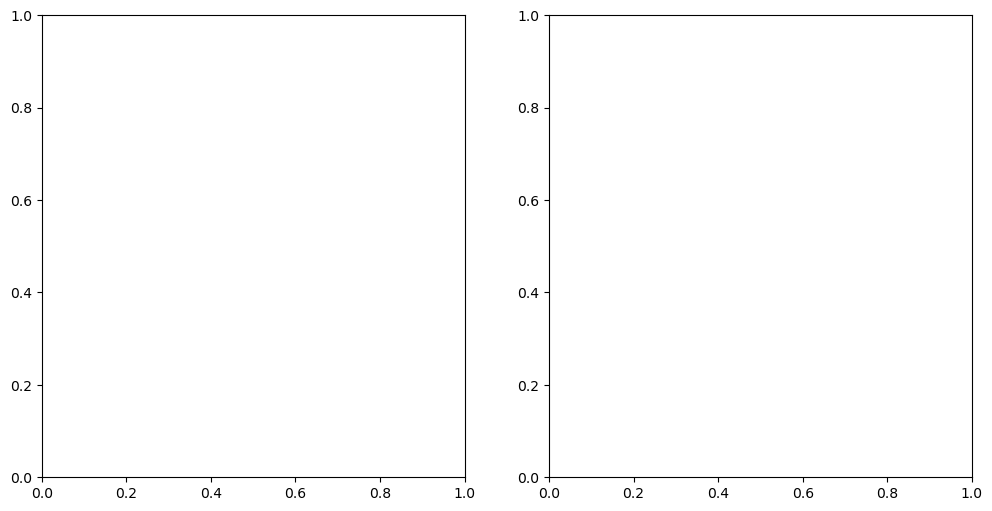

<Figure size 640x480 with 0 Axes>

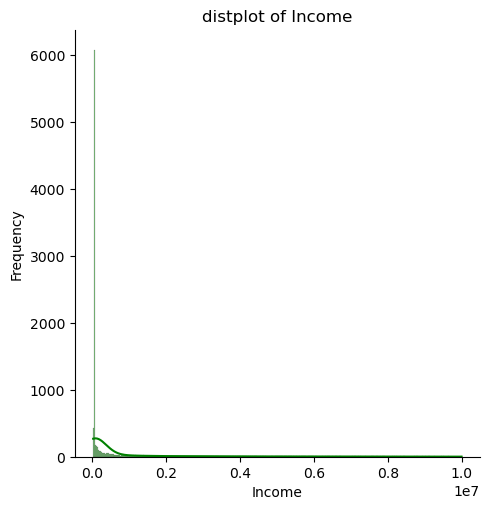

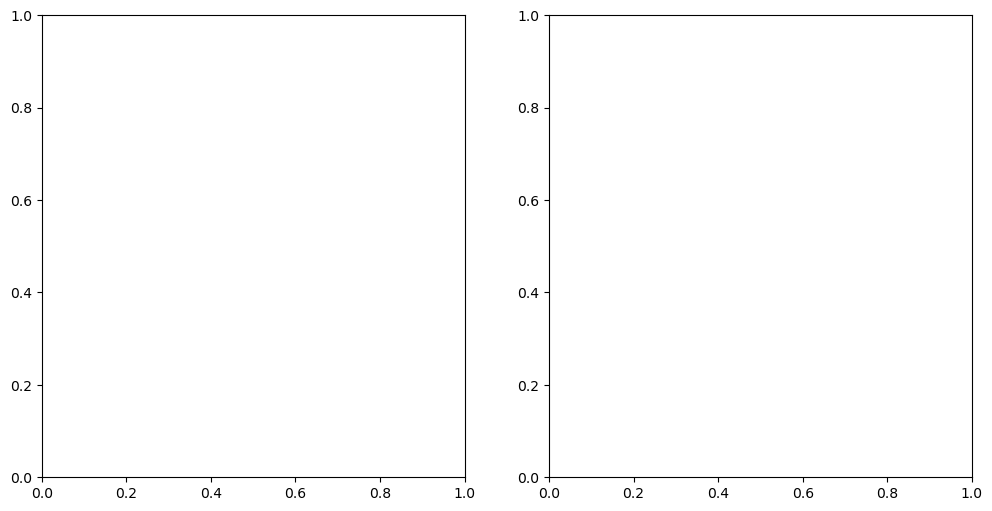

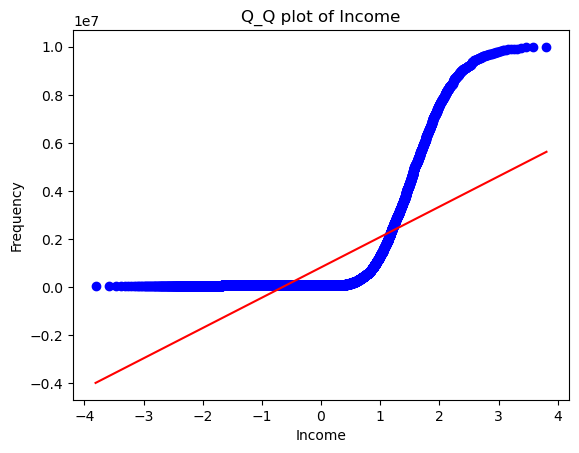

In [263]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
      
plt.figure()# Create a new figure for each plot
sns .displot(house_income[column],color = "g",kde=True)  # Plot histogram with 10 bins
plt.xlabel(column)  # Set x-axis label as the column name
plt.ylabel('Frequency')  # Set y-axis label
plt.title(f'distplot of {column}')  # Set plot titl
plt.show() 

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.figure()# Create a new figure for each plot
stats.probplot(house_income[column],dist="norm", plot=plt)  # Plot histogram with 10 bins
plt.xlabel(column)  # Set x-axis label as the column name
plt.ylabel('Frequency')  # Set y-axis label
plt.title(f'Q_Q plot of {column}')  # Set plot titl
plt.show() 

In [194]:
house_income.head()

,Age,Education_Level,Occupation,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


<br>
here now applying the Bivaiate anlyis 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3336\3760059070.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(house_income[column],palette="Pastel1" )
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


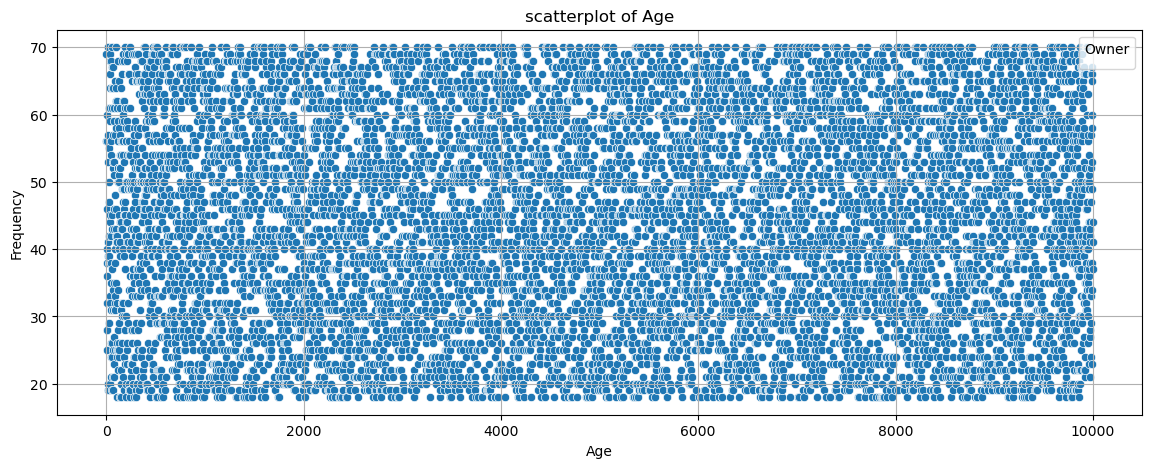

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3336\3760059070.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(house_income[column],palette="Pastel1" )
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


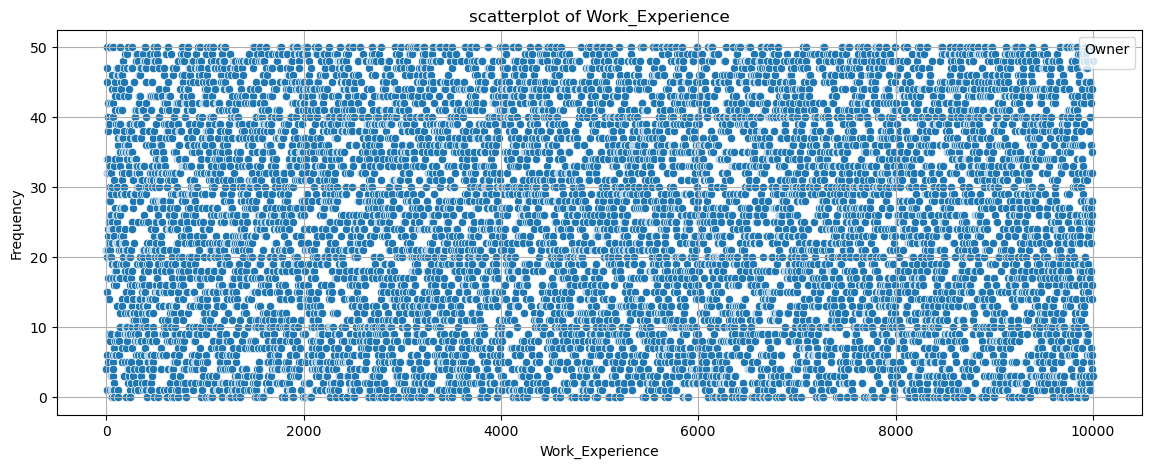

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3336\3760059070.py:34: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(house_income[column],palette="Pastel1" )
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


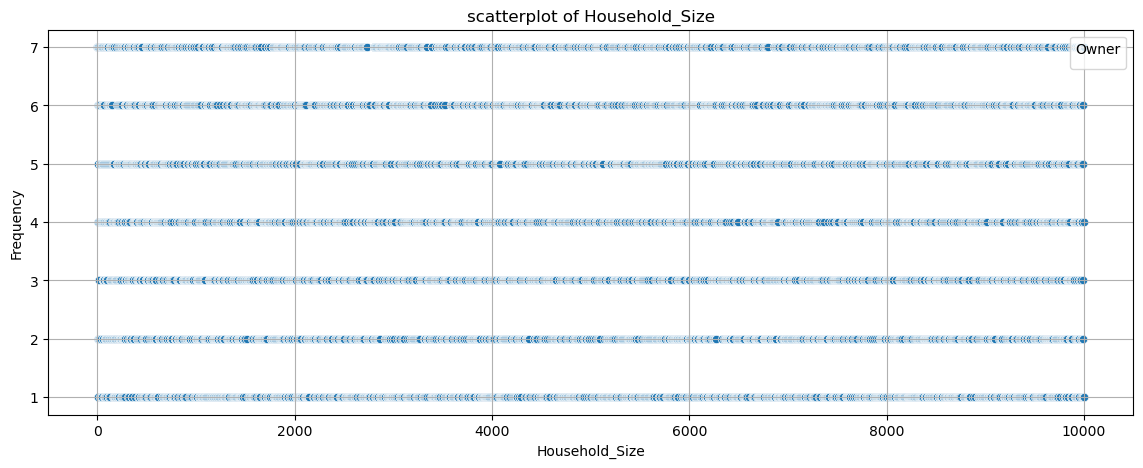

In [195]:
for column in house_income.columns:
    if column == 'Age':
      plt.figure(figsize = (14,5))
      sns.scatterplot(house_income[column],palette="Pastel1" )
      plt.legend(title='Owner', loc='upper right')
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'scatterplot of {column}')  # Set plot titl
# plt.legend( loc='upper right')
      plt.grid(True)
      plt.show()
    if column == 'Number_of_Dependents':
      plt.figure(figsize = (14,5))
      sns.scatterplot(house_income[column],palette="Pastel1" )
      plt.legend(title='Owner', loc='upper right')
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'scatterplot of {column}')  # Set plot titl
# plt.legend( loc='upper right')
      plt.grid(True)
      plt.show()
    if column == 'Work_Experience':
      plt.figure(figsize = (14,5))
      sns.scatterplot(house_income[column],palette="Pastel1" )
      plt.legend(title='Owner', loc='upper right')
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'scatterplot of {column}')  # Set plot titl
# pl t.legend( loc='upper right')
      plt.grid(True)
      plt.show()
    if column == 'Household_Size':
     plt.figure(figsize = (14,5))
     sns.scatterplot(house_income[column],palette="Pastel1" )
     plt.legend(title='Owner', loc='upper right')
     plt.xlabel(column)  # Set x-axis label as the column name
     plt.ylabel('Frequency')  # Set y-axis label
     plt.title(f'scatterplot of {column}')  # Set plot titl
# plt.legend( loc='upper right')
     plt.grid(True)
     plt.show()

    else :
         continue

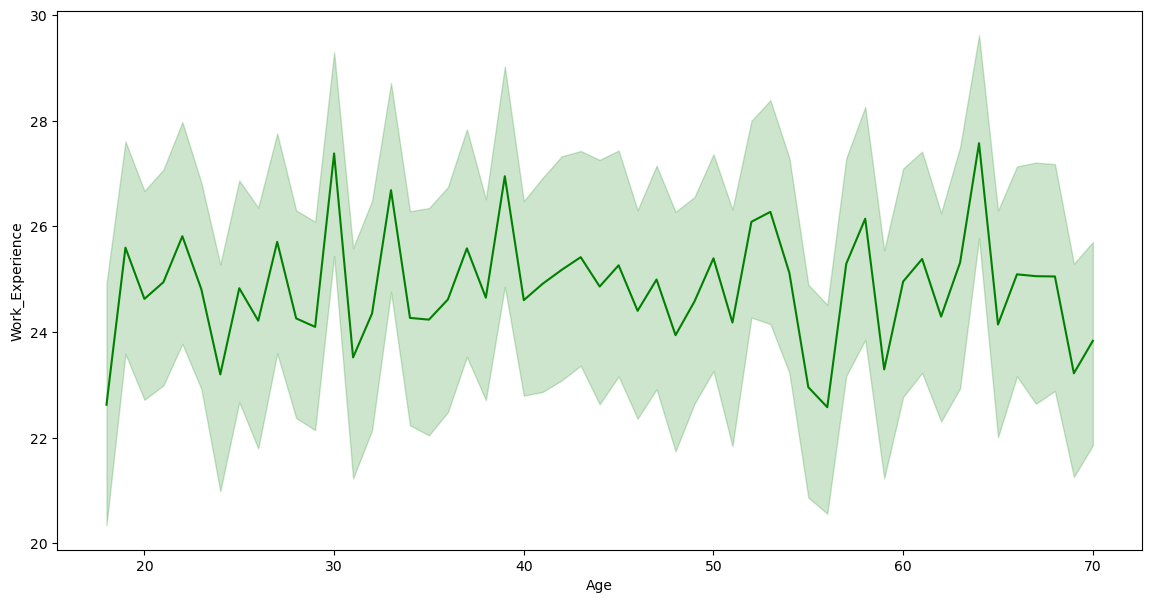

In [196]:
plt.figure(figsize = (14,7))
sns.lineplot(x ="Age",y = "Work_Experience",data = house_income,color= "g")
plt.show()

In [197]:
correlation_matrix = house_income.describe().corr()
correlation_matrix

,Age,Work_Experience,Household_Size,Income
Age,1.000000,0.999998,0.999989,-0.189583
Work_Experience,0.999998,1.000000,0.999993,-0.189699
Household_Size,0.999989,0.999993,1.000000,-0.192352
Income,-0.189583,-0.189699,-0.192352,1.000000


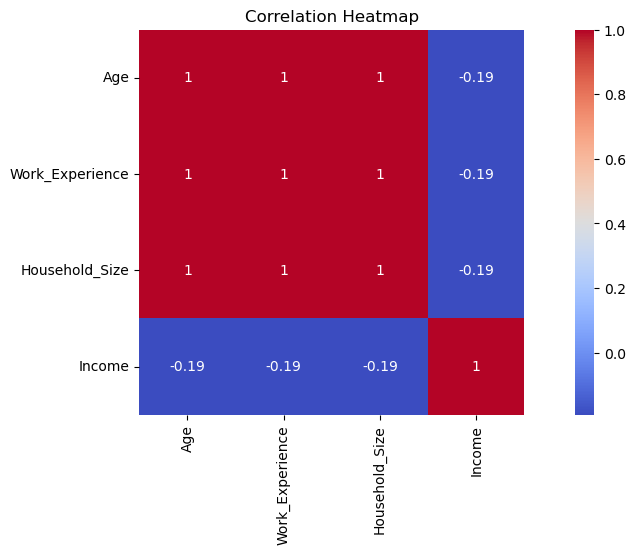

In [198]:
plt.figure(figsize=(13, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3336\2458008123.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_matrix.columns, y=correlation_matrix.iloc[0], palette='viridis')


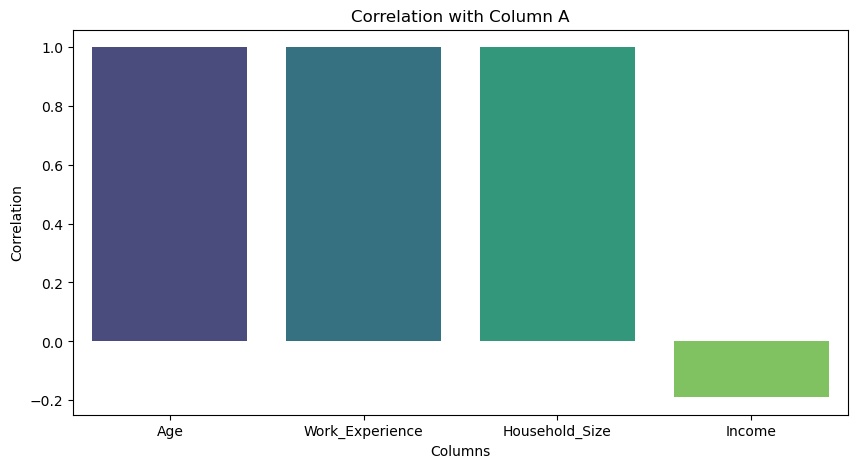

In [199]:
plt.figure(figsize=(10, 5))
sns.barplot(x=correlation_matrix.columns, y=correlation_matrix.iloc[0], palette='viridis')
plt.title('Correlation with Column A')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.show()

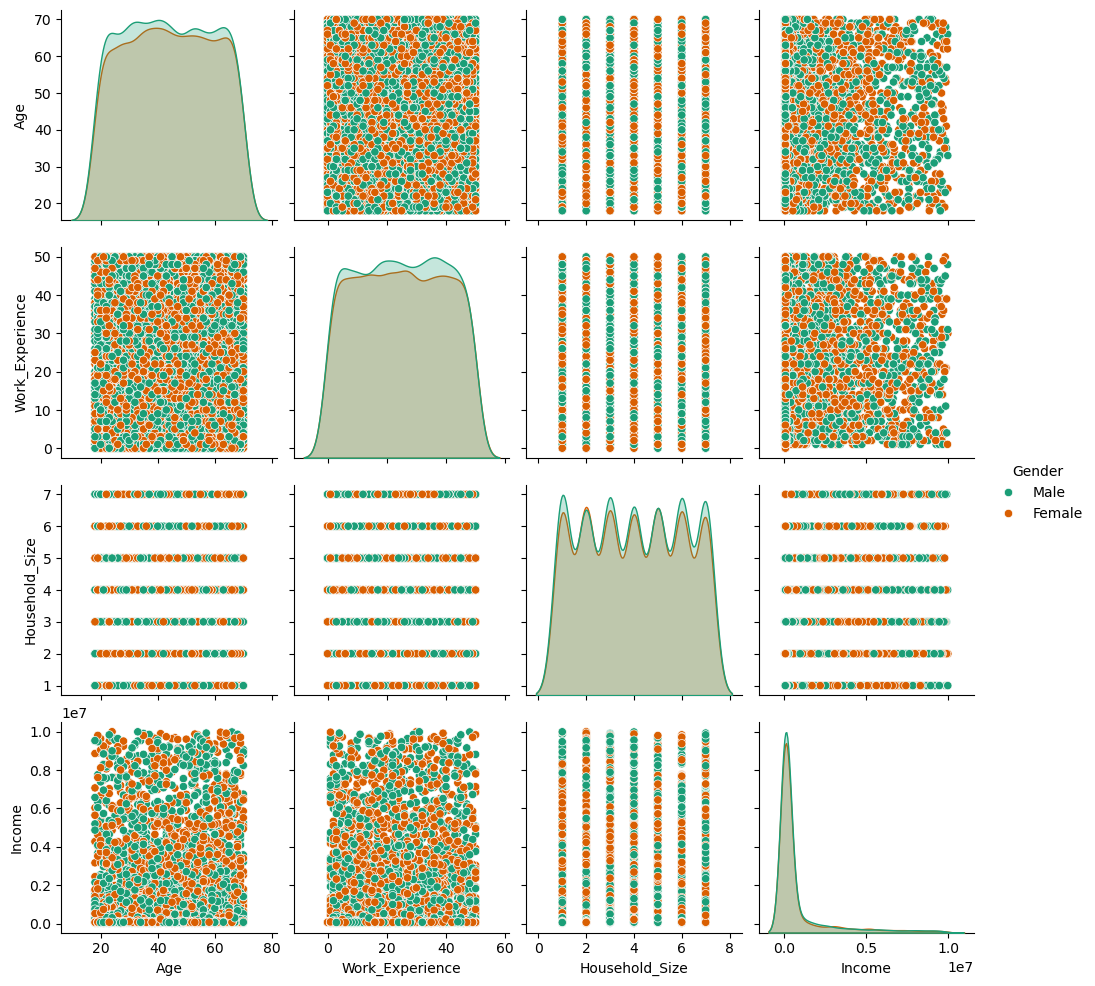

In [200]:
# fist we applying the pair polt
sns.pairplot(house_income,hue = 'Gender',palette='Dark2')
plt.show()

In [201]:
house_income.head()

,Age,Education_Level,Occupation,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


In [202]:
x = house_income.drop('Income',axis = 1)
y = house_income['Income']

In [203]:
x.head()

,Age,Education_Level,Occupation,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation
0,56,Master's,Technology,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit
1,69,High School,Finance,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking
2,46,Bachelor's,Technology,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car
3,32,High School,Others,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car
4,60,Bachelor's,Finance,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking


In [204]:
y

0         72510
1         75462
2         71748
3         74520
4        640210
         ...   
9995      74994
9996      72676
9997    2684820
9998      57955
9999    1131084
Name: Income, Length: 10000, dtype: int64

In [205]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [206]:
x_train.head(3)

,Age,Education_Level,Occupation,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation
9254,44,Bachelor's,Technology,Urban,27,Single,Part-time,7,Own,Single-family home,Female,Public transit
1561,45,Bachelor's,Healthcare,Suburban,19,Married,Full-time,7,Rent,Single-family home,Female,Car
1670,68,Doctorate,Education,Rural,26,Single,Part-time,5,Own,Single-family home,Male,Car


In [207]:
x_train.shape

(8000, 12)

In [208]:
x_test.head()

,Age,Education_Level,Occupation,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation
6252,52,High School,Healthcare,Urban,38,Divorced,Full-time,1,Own,Townhouse,Male,Biking
4684,24,Bachelor's,Education,Urban,24,Married,Self-employed,2,Rent,Townhouse,Female,Car
1731,70,Bachelor's,Technology,Urban,6,Divorced,Full-time,4,Own,Apartment,Female,Walking
4742,43,High School,Finance,Urban,2,Single,Full-time,1,Own,Single-family home,Female,Biking
4521,43,High School,Education,Urban,36,Married,Part-time,6,Own,Apartment,Female,Biking


In [209]:
x_test.shape

(2000, 12)

In [210]:
y_train.shape

(8000,)

In [211]:
y_test.shape

(2000,)

In [212]:
# # Define the preprocessing steps for numerical and categorical columns
# numerical_features = ['Age','Number_of_Dependents','Work_Experience','Household_Size']
# ordinal_features = ['Education_Level']
# categorical_features = ['Occupation', 'Location	', 'Marital_Status','Employment_Status','Homeownership_Status','Type_of_Housing','Gender']

In [213]:
# numerical_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())
# ])

# ordinal_transformer = Pipeline(steps=[
#     ('encoder', OrdinalEncoder())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'))
# ])

In [214]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_features),
#         ('ord', ordinal_transformer, ordinal_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

In [215]:
# # Create the final pipeline including the preprocessor and a classifier
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('linear regression', LinearRegression(),
#     ('logistic regression',LogisticRegression()))
# ])

In [216]:
# from sklearn import set_config
# # Plot the pipeline
# set_config(display='diagram')
# display(pipeline)

In [217]:
# pipeline.fit(x_train, y_train)

# # Make predictions
# predictions = pipeline.predict(X_test)


In [220]:
house_income.head()

,Age,Education_Level,Occupation,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


In [223]:
transformer = ColumnTransformer(transformers=[
    # ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(),[1]),
    ('trf3',OneHotEncoder(sparse_output = False,drop='first',handle_unknown = 'ignore'),[2,3,5,6,8,9,10,11]),
    # ('label', LabelEncoder(), ['order_ delivered'])
],remainder='passthrough')

In [224]:
x_train_trf = transformer.fit_transform(x_train)
x_train_trf.shape

(8000, 21)

In [225]:
x_test_trf = transformer.transform(x_test)
x_test_trf.shape

(2000, 21)

In [226]:
x_train_trf

array([[ 0.,  0.,  0., ..., 44., 27.,  7.],
       [ 0.,  0.,  1., ..., 45., 19.,  7.],
       [ 1.,  0.,  0., ..., 68., 26.,  5.],
       ...,
       [ 1.,  0.,  0., ..., 39., 34.,  2.],
       [ 2.,  1.,  0., ..., 27., 22.,  1.],
       [ 2.,  0.,  0., ..., 19., 32.,  7.]])

In [227]:
x_train_trf = pd.DataFrame(x_train_trf)
# x_train_trf = pd.DataFrame(x_train_trf,columns = ['Year',])
x_train_trf.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,44.0,27.0,7.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,45.0,19.0,7.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,68.0,26.0,5.0
3,3.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,53.0,25.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,44.0,16.0,6.0


In [228]:
x_test_trf = pd.DataFrame(x_test_trf)
# x_train_trf = pd.DataFrame(x_train_trf,columns = ['Year',])
x_test_trf.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,52.0,38.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,24.0,24.0,2.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,70.0,6.0,4.0
3,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,43.0,2.0,1.0
4,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,36.0,6.0


In [229]:
x_test_trf.value_counts()

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18    19    20 
0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  37.0  24.0  7.0    1
2.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  29.0  8.0   4.0    1
                                                       1.0  0.0  1.0  0.0  0.0  0.0  0.0  44.0  27.0  2.0    1
                                                                 0.0  1.0  1.0  0.0  0.0  55.0  4.0   3.0    1
                                                                           0.0  0.0  1.0  70.0  35.0  5.0    1
                                                                                                            ..
0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  30.0  19.0  7.0    1
                                                                                     0.0  22.0  5.0   6.0    1
      

In [230]:
y_train

9254     75212
1561    728247
1670     69156
6087     74334
6669     75290
         ...  
5734    122041
5191     72640
5390     44701
860      73808
7270     72324
Name: Income, Length: 8000, dtype: int64

In [231]:
y_test

6252      74742
4684    5989527
1731      69356
4742     790523
4521    9732313
         ...   
6412      71150
8285      64916
7853     147809
1095      70212
6929     127291
Name: Income, Length: 2000, dtype: int64

In [232]:
# now reading the the model in the datafrme 
li_reg = LinearRegression()
li_reg.fit(x_train_trf,y_train)

LinearRegression()

In [233]:
y_pred = li_reg.predict(x_test_trf)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Mean Squared Error: 3143189635981.153
Mean Absolute Error: 1104669.5960312784
R² Score: 0.0036998794298706006


In [234]:
# now reading the the model in the datafrme 
log_reg= LogisticRegression()
log_reg.fit(x_train_trf,y_train)

x:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [235]:
y_pred = log_reg.predict(x_test_trf)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Mean Squared Error: 3985045043831.0474
Mean Absolute Error: 813425.8165
R² Score: -0.26314391349376276


In [236]:
Rid_reg = Ridge()
Rid_reg.fit(x_train_trf,y_train)

Ridge()

In [237]:
y_pred = Rid_reg.predict(x_test_trf)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Mean Squared Error: 3143159441205.894
Mean Absolute Error: 1104681.2388148294
R² Score: 0.0037094502995014267


In [238]:
La_reg = Lasso()
La_reg.fit(x_train_trf,y_train)

Lasso()

In [239]:
y_pred = La_reg.predict(x_test_trf)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Mean Squared Error: 3143188389393.479
Mean Absolute Error: 1104670.0013003713
R² Score: 0.003700274562075001


In [240]:
Lla_reg = ElasticNet()
Lla_reg.fit(x_train_trf,y_train)

ElasticNet()

In [241]:
y_pred = Lla_reg.predict(x_test_trf)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Mean Squared Error: 3142302882567.632
Mean Absolute Error: 1113183.2304644093
R² Score: 0.003980954590813268


In [242]:
Bayes_reg = BayesianRidge()
Bayes_reg.fit(x_train_trf,y_train)

BayesianRidge()

In [243]:
y_pred = Bayes_reg.predict(x_test_trf)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Mean Squared Error: 3151776319505.583
Mean Absolute Error: 1117775.597844945
R² Score: 0.000978149333551781


In [244]:
hub_reg = HuberRegressor()
hub_reg.fit(x_train_trf,y_train)

x:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


HuberRegressor()

In [245]:
y_pred = hub_reg.predict(x_test_trf)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Mean Squared Error: 3685611520217.456
Mean Absolute Error: 756213.9051681369
R² Score: -0.16823215498453203


In [246]:
lar_reg = Lars()
lar_reg.fit(x_train_trf,y_train)

Lars()

In [247]:
y_pred = lar_reg.predict(x_test_trf)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Mean Squared Error: 3143189635981.147
Mean Absolute Error: 1104669.596031278
R² Score: 0.003699879429872488


In [248]:
lass_reg = LassoLars()
lass_reg.fit(x_train_trf,y_train)

LassoLars()

In [249]:
y_pred = lass_reg.predict(x_test_trf)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Mean Squared Error: 3143188384358.607
Mean Absolute Error: 1104669.9987645606
R² Score: 0.0037002761579837395


In [250]:
orth_reg = OrthogonalMatchingPursuit()
orth_reg.fit(x_train_trf,y_train)

OrthogonalMatchingPursuit()

In [251]:
y_pred = orth_reg.predict(x_test_trf)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Mean Squared Error: 3151460683741.3486
Mean Absolute Error: 1117459.1532350564
R² Score: 0.0010781967332896825
